In [0]:
#Click File Upload AND PASTE ON Github
#https://github.com/niazwazir/CAMERA_IMAGES_HR_MODEL/blob/master/HIGH_RESOLUTION_CAMERA_MODEL.ipynb

In [1]:
!git clone https://github.com/niazwazir/CAMERA_IMAGES_HR_MODEL.git

Cloning into 'CAMERA_IMAGES_HR_MODEL'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [2]:
!ls

CAMERA_IMAGES_HR_MODEL	sample_data


In [3]:
cd CAMERA_IMAGES_HR_MODEL

/content/CAMERA_IMAGES_HR_MODEL


In [4]:
!ls

HIGH_RESOLUTION_CAMERA_MODEL.ipynb  LR_IMAGES.zip  wazir_model.h5


In [5]:
!unzip LR_IMAGES.zip

Archive:  LR_IMAGES.zip
   creating: LR_IMAGES/
 extracting: LR_IMAGES/000010 resized.png  
 extracting: LR_IMAGES/000009 resized.png  
 extracting: LR_IMAGES/000008 resized.png  
 extracting: LR_IMAGES/000007 resized.png  
 extracting: LR_IMAGES/000006 resized.png  
 extracting: LR_IMAGES/000005 resized.png  
 extracting: LR_IMAGES/000004 resized.png  
 extracting: LR_IMAGES/000003 resized.png  
 extracting: LR_IMAGES/000002 resized.png  
 extracting: LR_IMAGES/000001 resized.png  


In [6]:
import scipy.misc
import numpy as np
from glob import glob
import keras.backend as K
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Model, Input
from keras.layers import Conv2D, BatchNormalization, Activation

Using TensorFlow backend.


In [0]:
from PIL import Image
import os, sys
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [0]:
!mkdir BICUBIC_IMAGES

In [0]:
path = "LR_IMAGES/"
path1 = "BICUBIC_IMAGES/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path1+item)
            imResize = im.resize((64,64), Image.ANTIALIAS)
            imResize.save(f + ' resized.png', 'png', quality=50)

resize()

In [0]:
CAMERA_IMAGES = glob('./LR_IMAGES/*.png')
bicubic_images_path = glob('./BICUBIC_IMAGES/*.png')
CAMERA = [];Bicubic = []
for camera, bicubic in zip(CAMERA_IMAGES, bicubic_images_path):
    CAMERA.append(imread(camera))
    Bicubic.append(imread(bicubic))
CAMERA = np.array(CAMERA).astype('float32')
Bicubic = np.array(Bicubic).astype('float32')

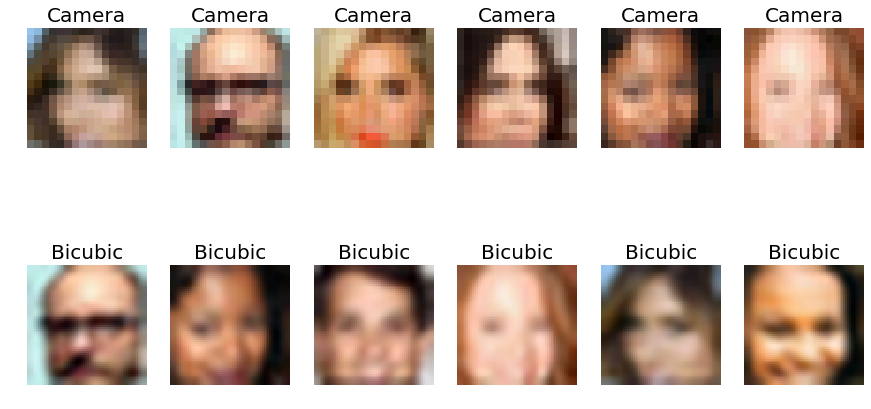

In [11]:
f, ax = plt.subplots(2,6,figsize=(15,8))
for i in range(6):
    ax[0,i].imshow(CAMERA[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Camera', size=20)
    ax[1,i].imshow(Bicubic[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Bicubic', size=20)
plt.show()

In [12]:
deblur_CNN_input = Input(shape=(64,64,3))

deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
deblur_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 320)       0         
__________

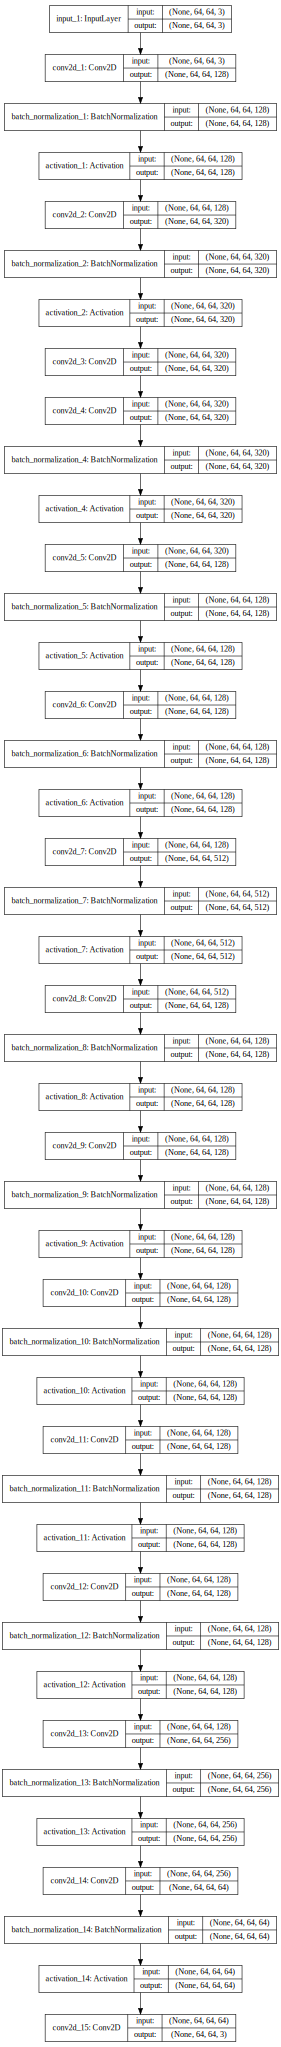

In [14]:
SVG(model_to_dot(deblur_CNN, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer= adam, loss= 'mean_squared_error')
deblur_CNN.load_weights('wazir_model.h5')

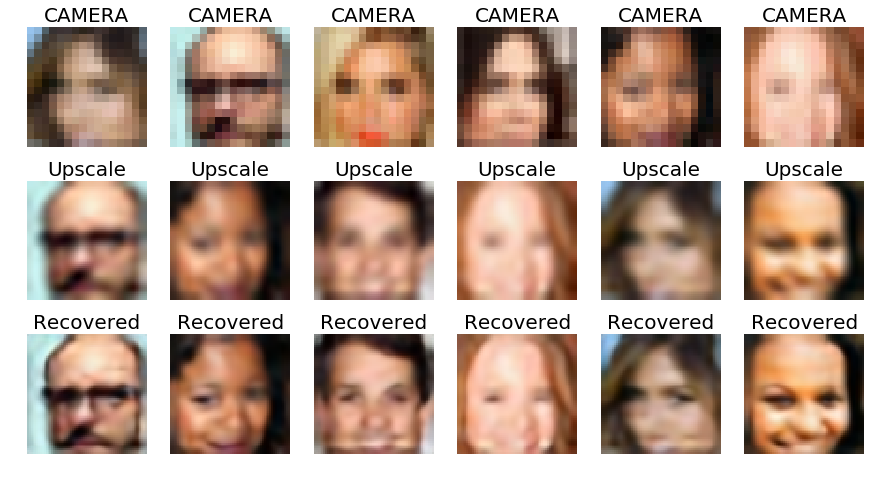

In [16]:
Deblurred = deblur_CNN.predict(Bicubic)
Deblurred = np.clip(Deblurred, 0, 255)
f, ax = plt.subplots(3,6, figsize=(15,8))
for i in range(6):
    ax[0,i].imshow(CAMERA[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('CAMERA', size=20)
    ax[1,i].imshow(Bicubic[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Upscale', size=20)
    ax[2,i].imshow(Deblurred[i].astype('uint8'));  ax[2,i].axis('Off'); ax[2,i].set_title('Recovered', size=20)
plt.show()